In [ ]:
# Function to decode operation

In [13]:
%pylab inline 

import mne
from mne.datasets import spm_face
from mne.decoding import GeneralizationAcrossTime
import sys
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from scipy import stats
#Add personal functions to python path
sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding/')
#sys.path.append('/Volumes/NeuroSpin2T/Calculation_Pedro_2014/scripts/decoding/')
from fldtrp2mne_calc import fldtrp2mne_calc
from calc_ClassifyTwoCond import calc_ClassifyTwoCond
from sklearn import svm
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import StratifiedKFold

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
#Directories
data_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/mat/'
result_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/decoding/'
#data_path = '/Volumes/NeuroSpin2T/Calculation_Pedro_2014/data/mat/'
#result_path = '/Volumes/NeuroSpin2T/Calculation_Pedro_2014/data/decoding/'

#Subjects
#subjects = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 
            #'s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18','s19', 's21', 's22']

subjects = ['s07']


#General parameters
baseline = (-0.5, -0.05)

downsmpDec = 4

#Decoding
trainset = 'attention'
testset = 'calculation'
decCond = ['left-right_add-sub']

params = {'baseline': baseline, 'downsmpDec': downsmpDec, 'Classification': decCond, 
          'trainset': trainset, 'testset': testset}

#Results initialization
all_scores = []
all_diagonals = []

In [15]:
for sub in subjects:
    #Load data
    fname= op.join(data_path, sub + '_calc.mat') 
    epoch,info = fldtrp2mne_calc(fname, 'data', 'calc')

    #Baseline-correct & filter data
    print('Baseline-correcting data for subject: ' + sub)
    epoch.apply_baseline(baseline)


    #Define sets index and trialinfo  
    idx_trainSet = info['operand1'] < 999 # just take all trials
    idx_testSet = (info['absdeviant'] != 0) & (info['preResult'] >= 3) & (info['preResult'] <= 6) & (info['preResult'] != info['operand1'])
    info_train = info[idx_trainSet]
    info_test = info[idx_testSet]

    # Correct the cue labels
    labels_train = 'operand1'
    labels_test = 'preResult'
    stop
    #idx_testSet = idx_trainSet
    #info_test = info_train
    #labels_test = labels_train

    # Decoding train
    X_train = epoch[idx_trainSet] #
    # Crop train epochs
    X_train = X_train.crop(tmin=X_train.times[75], tmax=X_train.times[325]) # crop from -200 to 800 ms
    y_train = np.array(info_train[labels_train]) #
    y_train = y_train.astype(numpy.float64)
    # Downsampling for decoding
    X_train.decimate(downsmpDec)
    #params.update({'testingTime':np.array(X_train.times)}) #Define test time
    # Correct the above line by something like this:
    # trainTime = {'start': 0, 'stop': 0.833, 'step': 0.833, 'length': 0.833}
    
    # Decoding test
    X_test = epoch[idx_testSet]#
    # Crop test epochs
    X_test = X_test.crop(tmin=X_test.times[75], tmax=X_test.times[-1]) # crop from -200 on
    y_test = np.array(info_test[labels_test]) #
    y_test = y_test.astype(numpy.float64)
    # Downsampling for decoding
    X_test.decimate(downsmpDec)
    #params.update({'testingTime':np.array(X_test.times)}) #Define test time

    print('Decoding subject: ' + sub)
    gat, score, diagonal = calc_ClassifyTwoCond(X_train, y_train, X_test, y_test, params)
    gat.plot()
    #gat.plot_diagonal()  # plot decoding across time (correspond to GAT diagonal)

    #Store scores of different subjects in the same list
    #all_scores.append(score)
    #all_diagonals.append(diagonal)
    
#Transform into a numpy array   
#all_scores = np.array(all_scores)
#all_diagonals = np.array(all_diagonals)

# Save individual results
#fname = op.join(result_path, 'Classification_ ' + '_Trainset_' + trainset + '_Testset_' + testset) 
fname = op.join(result_path, 'Op1Res_train_times') 
np.save(fname, X_train.times)
fname = op.join(result_path, 'Op1Res_test_times') 
np.save(fname, X_test.times)

# Compute group averages
#group_scores = np.mean(all_scores, 0)
#sem_group_scores = stats.sem(all_scores, 0)

#group_diagonal = np.mean(all_diagonals, 0)
#sem_group_diagonal = stats.sem(all_diagonals, 0)
    

Baseline-correcting data for subject: s07
Applying baseline correction ... (mode: mean)


NameError: name 'stop' is not defined

In [22]:
epochsGAVG = epoch.average()

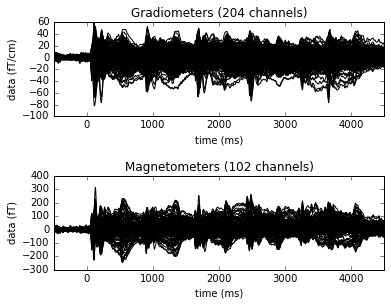

/volatile/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


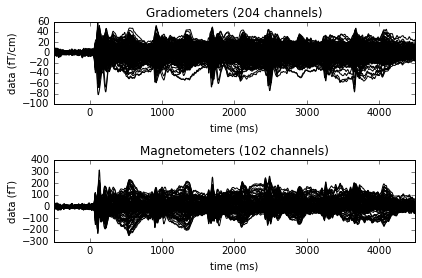

In [23]:
epochsGAVG.plot()

In [31]:
info_test['delay']

0      0
2      1
4      1
5      1
6      0
8      0
9      1
10     0
17     0
18     0
21     0
24     1
26     0
27     1
33     0
38     1
39     0
44     0
47     1
59     1
60     0
64     1
76     0
78     0
81     0
83     1
85     1
104    1
105    0
106    0
      ..
245    1
249    1
252    1
271    1
279    0
291    1
305    0
307    1
311    1
318    0
323    1
331    0
338    1
339    1
341    0
359    0
361    0
367    0
368    1
370    1
374    1
378    1
380    1
384    0
395    1
401    1
405    0
407    1
411    1
416    1
Name: delay, dtype: int32

In [29]:
from mne.time_frequency import tfr_morlet
freqs = np.arange(6, 30, 3)  # define frequencies of interest
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epoch, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=-1)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   17.9s
[Parallel(n_jobs=8)]: Done 306 out of 306 | elapsed:   20.1s finished


Applying baseline correction 'logratio' during (-0.5, 0)
Applying baseline correction ... (mode: logratio)


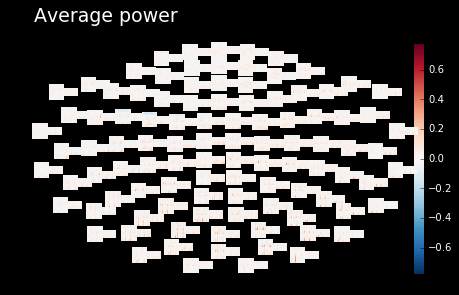

Applying baseline correction 'logratio' during (-0.5, 0)
Applying baseline correction ... (mode: logratio)


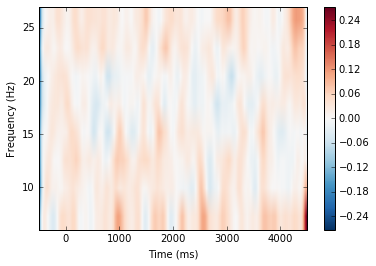

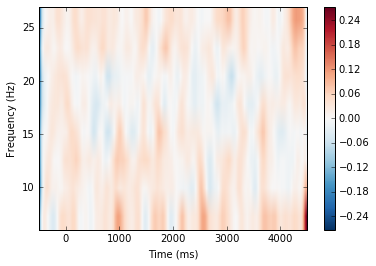

In [30]:
# Inspect power
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([82], baseline=(-0.5, 0), mode='logratio')

Applying baseline correction ... (mode: logratio)
Applying baseline correction ... (mode: logratio)


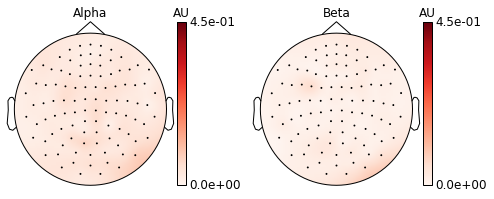

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(7, 4))
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[0],
                   title='Alpha', vmax=0.45, show=False)
power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta', vmax=0.45, show=False)
mne.viz.tight_layout()
plt.show()


In [ ]:
# Plotting  

# Plot GAT
plt.imshow(group_scores, origin = 'lower', extent = [X_train.times[0], X_train.times[len(X_train.times)-1], 
                                                     X_train.times[0], X_train.times[len(X_train.times)-1]]) #flip the matrix around
plt.axvline(0, color = 'k') #mark stimulus onset
plt.axhline(0, color = 'k') #mark stimulus onset
plt.colorbar()
plt.xlabel('Testing Time (s)')
plt.ylabel('Training Time (s)')
plt.title('Group average generalization across time \n Classification: ' + decCond[0] + ' vs ' 
+ decCond[1] + '\n Trainset: ' + trainset + ', Testset: ' + testset)



In [ ]:
# Plot Diagonal
plt.plot(X_train.times, group_diagonal, label = "Classification score")
plt.axvline(0, color = 'k') #mark stimulus onset
plt.axvline(.8, color = 'k') #mark stimulus onset
plt.axvline(1.6, color = 'k') #mark stimulus onset
plt.axvline(2.4, color = 'k') #mark stimulus onset
plt.axvline(3.2, color = 'k') #mark stimulus onset
plt.axvline(3.6, color = 'k') #mark stimulus onset

plt.axhline(0.25, color = 'k', ls = '--', label = "Chance") #mark chance level
plt.legend(loc = 'upper right')
plt.xlabel('Time (s)')
plt.ylabel('Classification Score (%)')
plt.title('Cl assification: ' + decCond[0] + ' vs ' 
+ decCond[1] + '\n Trainset: ' + trainset + ', Testset: ' + testset)


In [ ]:
group_scores.shape

In [ ]:
a = 'a'

In [ ]:
a == 'a'